<img src="./LogoB.png">

# **Redes Neuronales Parte I - 'Perceptron Neuron'**

En este _notebook_ se presetna la implementación y _prueba_ de una neurona perceptron como _clasificador binario_. Dicha implementación se realiza vía clases, tratando de _replicar_ lo que se hace en ***scikit-learn***(aunque a un nivel mucho más básico).

En cuanto al conjunto de entrenamiento, se toma la base de datos(_Toy Dataset_) digits. Resta por implementar lo correspondiente a _Validación Cruzada_, y realizar un análisis en detalle de los resultados obtenidos, así como de comparación con variaciones ligeras del _algoritmo_ de entrenamiento, métricas de desempeño, matrices de _confusión_ y demás.

In [1]:
# ======================== #
# == Módulos utilizados == #
# ======================== #
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
# ===================================== #
# == Datos de entrenamiento y prueba == #
# ===================================== #
#
# --> Carga la base de datos y extrae dos de los digitos para clasificación
digitos = load_digits()
x_raw = digitos.data
y_raw = digitos.target
Dig = int(input('Digite un número entre 1 y 9: '))
x = []
y = []
for i in range(len(y_raw)):
    if y_raw[i] == Dig or y_raw[i] == 0:
        x.append(x_raw[i])
        y.append(y_raw[i])

Digite un número entre 1 y 9:  4


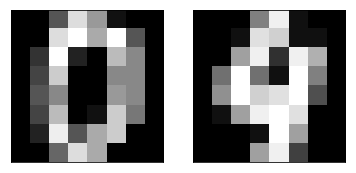

In [3]:
# ===================================================== #
# == Visualización de algunos de los datos extraídos == #
# ===================================================== #
# --> Muestra los digitos extraídos
D1 = x[0].reshape((8,8))
D2 = x[3].reshape((8,8))
fig, ax = plt.subplots(1,2)
ax[0].imshow(D1, cmap = 'gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(D2, cmap = 'gray')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

In [4]:
# ====================================================== #
# == Separa entre datos de entrenamiento y validación == #
# ====================================================== #
porcentaje =float(input('Porcentaje de los datos para entrenar: ')) / 100
lim = int(np.floor(len(x) * porcentaje))
# Entrenamiento
x_train = x[:lim]
y_train = y[:lim]
# Validación
x_test = x[lim:]
y_test = y[lim:]
# Cantidad de datos en cada conjunto
print("Cantidad de datos para entrenamiento: %d" % (len(x_train)))
print("Cantidad de datos para validacion: %d" % (len(x_test)))

Porcentaje de los datos para entrenar:  80


Cantidad de datos para entrenamiento: 287
Cantidad de datos para validacion: 72


In [5]:
# ======================================= #
# == 'Scaling' de los datos de entrada == #
# ======================================= #
# --> Normaliza los datos: Como es clasificador binario, y la funición utilizada es "hard_limiter"
# la salida estará entre 0 y 1, por lo tanto, se "escala" la entrada de tal manera que 
# también quede en el mismo rango [0, 1]
y_train_aux = (1 / Dig) * np.asarray(y_train)
x_train_aux = np.zeros_like(x_train)
#
for i in range(len(y_train)):
    x_train_aux[i] = x_train[i] / max(x_train[i])

#for i in range(len(y_hat)):
#    print("y_train[%d] = %d \t y_train_aux[%d] = %d" % (i, y_train[i], i, y_train_aux[i]))

In [6]:
# ====================================================================== #
# == Crea el modelo de ajuste lineal por mínimos cuadrados ordinarios == #
# ====================================================================== #
class perceptronNeuron():
    # ---------------------------- #
    # -- Contructor de la clase -- #
    # ---------------------------- #
    def __init__(self):
        self._pesos = np.asarray([])
        self._A = np.asarray([])
        self._max_iter = 100
        self._iter = 0
        self._tol = 1e-4
        self._error = 1.0
        self._eta = 1.0
        self._f = np.asarray([])
    # --------------------------------------------------------- #
    # -- Métodos uaxiliares para el entrenamiento del modelo -- #
    # --------------------------------------------------------- #
    def funcionActivacion(self, i):
        # Función de activación 'Hard Limiter'
        temp = np.matmul(self._A, self._pesos)
        result = []
        for i in range(len(temp)):
            if temp[i] >= 0:
                result.append(1)
            else:
                result.append(0)
        self._f = np.asarray(result).reshape((len(result), 1))
    # ------------------------------------ #
    # -- Método para entrenar el modelo -- # 
    # ------------------------------------ #
    def entrenamiento(self, x_train, y_train, echo = False):
        [nx, mx] = np.shape(x_train)
        self._A = np.zeros((nx, mx + 1))
        self._pesos = np.zeros((mx + 1, 1))
        self._A[:,0] = 1
        self._A[:,1:] = x_train
        for i in range(len(self._pesos)):
            self._error = 1.0
            self._iter = 0
            while (self._error > self._tol):
                self._iter += 1
                self.funcionActivacion(i)
                peso_nuevo = self._eta * np.matmul(self._A.T, (np.asarray(y_train).reshape((len(y_train), 1)) - self._f))
                self._error = np.abs(self._pesos[i] - peso_nuevo[i])
                self._pesos[i] += peso_nuevo[i]
                if(self._iter >= self._max_iter):
                    break
    # ---------------------- #
    # -- Prueba el modelo -- #
    # ---------------------- #
    def pruebaModelo(self, x_test):
        [f, c] = np.shape(x_test)
        A = np.zeros((f, c + 1))
        A[:, 0] = 1.0
        A[:,1:] = x_test
        tmp = np.matmul(A, self._pesos)
        result = np.zeros_like(tmp)
        for i in range(len(tmp)):
            if tmp[i] >= 0:
                result[i] = 1
        return result.reshape((len(result), 1))

In [7]:
# ============================================== #
# == Implementa el modelo de regresión lineal == #
# ============================================== #
#
# --> Crea un objeto neurona (instanciamiento de la clase)
perceptron = perceptronNeuron()
# --> Entrena la neurona con los 'datos escalados', tanto en x como en y
perceptron.entrenamiento(x_train_aux, y_train_aux)

In [8]:
# --> Prueba el modelo
y_hat = perceptron.pruebaModelo(x_test)
# --> Calcula una especie de 'error de prueba'. Es decir, un vector que indica con el caracter 'S' en las posiciones en donde el algortimo falló, y
# con un caracter '-' en donde el algoritmo acertó.
error = []
cont = 0
for i in range(len(y_hat)):
    if(np.abs(y_test[i] - 4 * y_hat[i]) != 0):
        error.append(str('S'))
        cont += 1
    else:
        error.append(str('-'))
# --> Muestra los resultados de la Prueba del modelo, y del vector de 'error'
print("Porcentaje de error: %1.2f (%d fallos en %d muestras)\n" % (100 * cont / len(y_hat), cont, len(y_hat)))
for i in range(len(y_hat)):
    print("y_test[%d] = %d \t y_hat[%d] = %d \t error[%d] = %s" % (i, y_test[i], i, 4 * y_hat[i], i, error[i]))

Porcentaje de error: 30.56 (22 fallos en 72 muestras)

y_test[0] = 4 	 y_hat[0] = 4 	 error[0] = -
y_test[1] = 0 	 y_hat[1] = 0 	 error[1] = -
y_test[2] = 0 	 y_hat[2] = 0 	 error[2] = -
y_test[3] = 4 	 y_hat[3] = 4 	 error[3] = -
y_test[4] = 0 	 y_hat[4] = 0 	 error[4] = -
y_test[5] = 0 	 y_hat[5] = 0 	 error[5] = -
y_test[6] = 0 	 y_hat[6] = 0 	 error[6] = -
y_test[7] = 4 	 y_hat[7] = 4 	 error[7] = -
y_test[8] = 4 	 y_hat[8] = 4 	 error[8] = -
y_test[9] = 0 	 y_hat[9] = 0 	 error[9] = -
y_test[10] = 0 	 y_hat[10] = 0 	 error[10] = -
y_test[11] = 0 	 y_hat[11] = 0 	 error[11] = -
y_test[12] = 4 	 y_hat[12] = 4 	 error[12] = -
y_test[13] = 4 	 y_hat[13] = 4 	 error[13] = -
y_test[14] = 4 	 y_hat[14] = 4 	 error[14] = -
y_test[15] = 0 	 y_hat[15] = 0 	 error[15] = -
y_test[16] = 4 	 y_hat[16] = 4 	 error[16] = -
y_test[17] = 4 	 y_hat[17] = 4 	 error[17] = -
y_test[18] = 4 	 y_hat[18] = 4 	 error[18] = -
y_test[19] = 4 	 y_hat[19] = 4 	 error[19] = -
y_test[20] = 0 	 y_hat[20] = 0 	 er